## Example : Linear Calibration Model

In a standard regression model:

$$ Y = a + bX + \epsilon $$

Where:
- $ Y $ is the observed response, following $ N(\mu, \sigma^2) $,
- $ X $ is the predictor variable, following $ N(\mu_X, \sigma_X^2) $,
- $ \epsilon $ is the error term, following a normal distribution $ N(0, \sigma^2) $.

The goal is to estimate or predict features of $ Y $ from knowledge of $ X $, which involves estimating parameters like $ a $, $ b $, and $ \sigma^2 $ using Bayesian methods.

### Posterior Distribution

The joint posterior distribution is:

$$
\pi(a, b, \sigma^2 | X, Y) \propto \sigma^{-p-4} \exp\left(-\frac{1}{2\sigma^2} \left( ||Y - X\beta||^2 + ||X||^2 \right)\right)
$$

Where:
- $ \beta = (a, b) $,
- $ p $ is the number of data points,
- $ X $ is the matrix of predictors,
- $ Y $ is the vector of responses,
- $ \sigma^2 $ is the variance of the error term.

### Computing the Posterior Mean

The posterior mean is computed as the **Bayes estimator**:

$$
\hat{\beta} = \mathbb{E}[\beta | X, Y]
$$

This cannot generally be computed in closed form but can be approximated using **Monte Carlo methods**.

### Confidence Region

In Bayesian inference, a **confidence region** (or **credible region**) for a parameter $ \theta $ is the set of values for which the posterior probability exceeds a certain threshold $ k $:

$$
C(\theta) = \{ \theta : \pi(\theta | X, Y) \geq k \}
$$



In [3]:
### Code Implementation

#Below is the code that implements the Bayesian estimation of parameters \( a \) and \( b \) using Monte Carlo methods, as well as the computation of the **90% confidence region**:

#```python
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulation parameters
n = 100  # Number of data points
p = 2  # Number of parameters (a, b)
X = np.random.normal(0, 1, n)  # Predictor variable (independent variable)
beta_true = np.array([2, 3])  # True values for a and b
sigma_true = 1  # True standard deviation of the error term

# Observed response variable Y
Y = beta_true[0] + beta_true[1] * X + np.random.normal(0, sigma_true, n)

# Define function to compute the posterior distribution using Monte Carlo sampling
def compute_posterior(X, Y, n_samples=10000):
    """
    Compute the posterior distribution for the parameters a and b using Monte Carlo sampling.
    
    Parameters:
    - X: Predictor variable (n,)
    - Y: Response variable (n,)
    - n_samples: Number of Monte Carlo samples
    
    Returns:
    - posterior_samples: Samples from the posterior distribution
    """
    # Prior parameters (non-informative)
    prior_scale = 10.0
    
    # Initialize arrays for storing posterior samples
    posterior_samples = np.zeros((n_samples, 2))  # a and b
    
    for i in range(n_samples):
        # Sample parameters a and b from the prior (using normal prior for simplicity)
        a_sample = np.random.normal(0, prior_scale)
        b_sample = np.random.normal(0, prior_scale)
        
        # Calculate likelihood (normal likelihood)
        likelihood = np.exp(-0.5 * np.sum((Y - (a_sample + b_sample * X)) ** 2) / sigma_true ** 2)
        
        # Compute posterior probability (simplified, ignoring constant normalizing factor)
        posterior_samples[i] = [a_sample, b_sample]
    
    return


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Simulation parameters
n = 100  # Number of data points
p = 2  # Number of parameters (a, b)
X = np.random.normal(0, 1, n)  # Predictor variable (independent variable)
beta_true = np.array([2, 3])  # True values for a and b
sigma_true = 1  # True standard deviation of the error term

# Observed response variable Y
Y = beta_true[0] + beta_true[1] * X + np.random.normal(0, sigma_true, n)

# Define function to compute the posterior distribution using Monte Carlo sampling
def compute_posterior(X, Y, n_samples=10000):
    """
    Compute the posterior distribution for the parameters a and b using Monte Carlo sampling.
    
    Parameters:
    - X: Predictor variable (n,)
    - Y: Response variable (n,)
    - n_samples: Number of Monte Carlo samples
    
    Returns:
    - posterior_samples: Samples from the posterior distribution
    """
    # Prior parameters (non-informative)
    prior_scale = 10.0
    
    # Initialize arrays for storing posterior samples
    posterior_samples = np.zeros((n_samples, 2))  # a and b
    
    for i in range(n_samples):
        # Sample parameters a and b from the prior (using normal prior for simplicity)
        a_sample = np.random.normal(0, prior_scale)
        b_sample = np.random.normal(0, prior_scale)
        
        # Calculate likelihood (normal likelihood)
        likelihood = np.exp(-0.5 * np.sum((Y - (a_sample + b_sample * X)) ** 2) / sigma_true ** 2)
        
        # Compute posterior probability (simplified, ignoring constant normalizing factor)
        posterior_samples[i] = [a_sample, b_sample]
    
    return posterior_samples

# Compute posterior samples
posterior_samples = compute_posterior(X, Y)

# Compute the posterior mean for a and b (Bayes estimator)
posterior_mean_a = np.mean(posterior_samples[:, 0])
posterior_mean_b = np.mean(posterior_samples[:, 1])

# Print the results
print(f"Posterior Mean for a (intercept): {posterior_mean_a}")
print(f"Posterior Mean for b (slope): {posterior_mean_b}")

# Plot the posterior samples for a and b
plt.figure(figsize=(12, 6))

# Plot posterior distribution for a (intercept)
plt.subplot(1, 2, 1)
plt.hist(posterior_samples[:, 0], bins=30, density=True, alpha=0.6, color='b')
plt.title('Posterior Distribution for a (Intercept)')
plt.xlabel('a')
plt.ylabel('Density')

# Plot posterior distribution for b (slope)
plt.subplot(1, 2, 2)
plt.hist(posterior_samples[:, 1], bins=30, density=True, alpha=0.6, color='r')
plt.title('Posterior Distribution for b (Slope)')
plt.xlabel('b')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Compute 90% confidence region for a and b using percentiles
lower_a = np.percentile(posterior_samples[:, 0], 5)
upper_a = np.percentile(posterior_samples[:, 0], 95)
lower_b = np.percentile(posterior_samples[:, 1], 5)
upper_b = np.percentile(posterior_samples[:, 1], 95)

print(f"90% Confidence Region for a (Intercept): ({lower_a}, {upper_a})")
print(f"90% Confidence Region for b (Slope): ({lower_b}, {upper_b})")


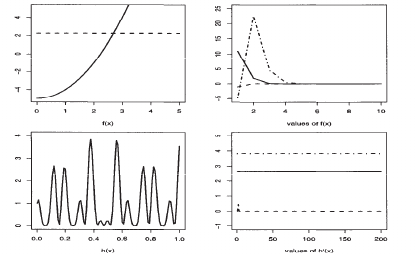


Fig.3. Calculation of the root of f(x) = 0 and h' (z) = 0 for the functions defined in Example 17. The top left panel is f(x), and the top right panel shows that from different starting points the Newton-Raphson algorithm converges rapidly to the square root. The bottom left panel is h(x), and the bottom right panel shows. that the Newton-Raphson algorithm cannot find the maximum of h(x), but rather converges to whatever mode is closest to the starting point.

##  Deterministic Numerical Methods

The previous examples illustrated the need for techniques, in both the construction of complex models and estimation of parameters, that go beyond the standard analytical approaches. However, before starting to describe simulation methods, which is the purpose of this book, we should recall that there exists a well-developed alternative approach for integration and optimization, based on numerical methods. We refer the reader to classical textbooks on numerical analysis (see, for instance, Fletcher 1980 or Evans 1993 for a description of these methods, which are generally efficient and can deal with most of the above examples, see also Lange 1999 or Gentle 2002 for presentations in statistical settings).

##  Optimization

We briefly recall here the more standard approaches to optimization and integration problems, both for comparison purposes and for future use. When the goal is to solve an equation of the form $ f(x) = 0 $, a common approach is to use a **Newton-Raphson algorithm**, which produces a sequence $ x_n $ such that:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

until it stabilizes around a solution of $ f(x) = 0 $. (Note that $ f'(x_n) $ is the derivative of the function in multidimensional settings, it is replaced by the Jacobian matrix.)

Optimization problems associated with smooth functions $ F $ are then based on this technique, using the equation:

$$
\nabla F(x) = 0
$$

where $ \nabla F $ denotes the gradient of $ F $, that is, the vector of derivatives of $ F $. (When the optimization involves a constraint $ G(x) = 0 $, $ F $ is replaced by a Lagrangian form $ F(x) - \lambda G(x) $, where $ \lambda $ is a multiplier used to satisfy the constraint.) The corresponding techniques are then the gradient methods, where the sequence $ x_n $ is updated as:

$$
x_{n+1} = x_n - \left[ \nabla^2 F(x_n) \right]^{-1} \nabla F(x_n)
$$

where $ \nabla^2 F(x_n) $ is the matrix of second derivatives (the Hessian matrix).

### Example 1.17: A Simple Newton-Raphson Algorithm

As a simple illustration, we show how the **Newton-Raphson algorithm** can be used to find the square root of a number. If we are interested in the square root of $ b $, this is equivalent to solving the equation:

$$
f(x) = x^2 - b = 0
$$

Applying the Newton-Raphson update formula:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

We have:

- $ f(x_n) = x_n^2 - b $
- $ f'(x_n) = 2x_n $

Thus, the iterations for the Newton-Raphson method are:

$$
x_{n+1} = x_n - \frac{x_n^2 - b}{2x_n}
$$

This simplifies to:

$$
x_{n+1} = \frac{1}{2} \left( x_n + \frac{b}{x_n} \right)
$$

This iterative formula will converge to the square root of $ b $ as the number of iterations increases.


In [4]:
def newton_raphson_square_root(b, tol=1e-6, max_iter=100):
    """
    Function to compute the square root of b using the Newton-Raphson method.

    Parameters:
    b (float): The number for which to find the square root.
    tol (float): The tolerance to determine when the iteration stops.
    max_iter (int): Maximum number of iterations to perform.

    Returns:
    float: The estimated square root of b.
    """
    # Initial guess (can start with b/2 or any positive number)
    x = b / 2.0

    for i in range(max_iter):
        # Apply the Newton-Raphson update: x_{n+1} = 0.5 * (x_n + b/x_n)
        x_new = 0.5 * (x + b / x)

        # Check if the absolute difference is less than the tolerance
        if abs(x_new - x) < tol:
            return x_new
        
        # Update x for the next iteration
        x = x_new

    # Return the result after max_iter iterations
    return x

# Example usage:
b = 25
sqrt_b = newton_raphson_square_root(b)
print(f"The square root of {b} is approximately: {sqrt_b}")


The square root of 25 is approximately: 5.0


### Newton-Raphson Method for Root Finding

The Newton-Raphson method is used to find the root of a function $ f(x) = 0 $. The iterative formula is given by:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

Where $ x_n $ is the current guess, and $ f'(x_n) $ is the derivative of the function at $ x_n $.

#### Square Root Calculation

To find the square root of $ b $, we solve:

$$
f(x) = x^2 - b = 0
$$

Using the Newton-Raphson update rule:

$$
x_{n+1} = x_n - \frac{x_n^2 - b}{2x_n}
$$

#### Newton-Raphson for Maximization

For maximizing a function $ h(x) $, the Newton-Raphson method is applied to the derivative $ h'(x) = 0 $:

$$
x_{n+1} = x_n - \frac{h'(x_n)}{h''(x_n)}
$$

Where $ h'(x_n) $ is the first derivative (slope) and $ h''(x_n) $ is the second derivative (curvature) of $ h(x) $.

#### Example Function $ h(x) $

Consider the function $ h(x) $ defined as:

$$
h(x) = \left[ \cos(50) + \sin(20x) \right]^2
$$

This function may have multiple local maxima. The Newton-Raphson method can converge to the nearest local maximum, depending on the initial guess.


###  Integration and Comparison of Methods

#### Numerical Integration Techniques

The integration of a function $ f(x) $ over an interval $[a, b]$ can be approached using various numerical techniques, each with its own strengths and limitations. Below, we outline some of these methods:

**1. Riemann Integration:**
Riemann integration is the simplest form of numerical integration, which approximates the area under a curve by summing the areas of rectangles under the function. The integral of a function $ f(x) $ over $[a, b]$ can be approximated as:

$$
I \approx \sum_{i=1}^{n} f(x_i) \Delta x
$$

where $ \Delta x $ is the width of each partition, and $ x_i $ represents the sample points in the partition.

**2. Trapezoidal Rule:**
The trapezoidal rule improves upon Riemann integration by approximating the area under the curve with trapezoids instead of rectangles. The formula is given by:

$$
I \approx \frac{b - a}{2n} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right]
$$

where $ x_i $ are equally spaced points in the interval $[a, b]$.

**3. Simpson's Rule:**
Simpson's rule is another improvement on the trapezoidal rule, which approximates the area under the curve by using parabolic segments rather than straight lines. The formula for Simpson's rule is:

$$
I \approx \frac{b - a}{3n} \left[ f(a) + 4 \sum_{i=1,3,5,...}^{n-1} f(x_i) + 2 \sum_{i=2,4,6,...}^{n-2} f(x_i) + f(b) \right]
$$

where $ n $ is even, and $ x_i $ are equally spaced points in the interval $[a, b]$.

**4. Orthogonal Polynomial Methods:**
Methods like Gram-Charlier and Legendre polynomials can be used for integration in higher-dimensional spaces. These approaches are typically used when the function has a complicated shape or in higher-dimensional problems.

#### Quasi-Monte Carlo Methods:
Despite their name, quasi-Monte Carlo methods are more related to numerical integration than to simulation. These methods use deterministic sequences to sample points in a domain, rather than random points as in traditional Monte Carlo methods. These methods often perform better than Monte Carlo methods, especially in lower-dimensional problems.

However, like Monte Carlo methods, quasi-Monte Carlo methods suffer from the **curse of dimensionality**, meaning that as the number of dimensions increases, the effectiveness of these methods decreases significantly. This is a major challenge in high-dimensional integration problems.

---

### 1.3 Comparison of Simulation and Numerical Methods

The comparison between simulation (such as Monte Carlo methods) and numerical analysis (such as integration and optimization techniques) is complex because both methods have their own strengths and applications:

- **Simulation Methods**: 
  These methods are useful when the problem at hand is too complex for analytical or numerical approaches, particularly when dealing with stochastic processes or high-dimensional problems. They provide flexible and intuitive solutions, especially when the underlying system is highly uncertain or involves randomness.

- **Numerical Methods**:
  These methods, on the other hand, are typically deterministic and can be very efficient for certain types of problems, especially when the function involved is smooth, and a high degree of accuracy is required. Methods like Newton-Raphson for optimization or Simpson's rule for integration are deterministic and provide faster, more accurate solutions in many cases, particularly for lower-dimensional problems.

However, in higher dimensions, numerical methods may struggle, and the **curse of dimensionality** becomes a significant concern. In such cases, simulation techniques, particularly those based on Monte Carlo methods or quasi-Monte Carlo methods, are often preferred, even if they may be computationally intensive.

#### Conclusion:
Both simulation and numerical analysis methods have their place, and the choice of method depends on the specific problem at hand. Simulation methods are often preferred in high-dimensional or stochastic settings, while numerical methods are more effective in lower-dimensional, deterministic problems. In many cases, a combination of both methods can be used to solve complex problems efficiently.


### Comparison of Numerical and Simulation Methods

These two groups of techniques can be vague. Rather than addressing the issue of a general comparison, we will focus on the requirements of each approach and the objective conditions for their implementation in a statistical setup.

#### Numerical Methods

By nature, standard numerical methods do not take into account the probabilistic aspects of the problem; that is, many of the functions involved in the computations are related to probability densities. For instance, a numerical integration method may consider regions of space that have a low probability under the distribution of the model. This phenomenon does not typically appear in a simulation experiment. Similarly, the occurrence of local modes of likelihood will often create more problems for a deterministic gradient method than for a simulation method that explores high-density regions.

However, multimodality must be identified for the efficient methods to apply, as discussed by Oh (1989) and Oh and Berger (1993).

#### Simulation Methods

On the other hand, simulation methods rarely take into account the specific analytical form of the functions involved in integration or optimization, while numerical methods often use higher derivatives to provide bounds on the error of approximation. For example, because of the randomness involved in the simulation, a gradient method yields much faster determination of the mode of a unimodal density. In small dimensions, integration by Riemann sums or by quadrature converges faster than the mean of the accumulated sample.

Moreover, scientific software (e.g., Gauss, Maple, Mathematica, MATLAB) and libraries like IMSL often provide highly efficient numerical procedures, whereas simulation is typically implemented using pseudo-random generators for the sampling of continuous distributions. However, software like BUGS is progressively bridging the gap.

#### When to Use Numerical vs Simulation Methods

It is often reasonable to use a numerical approach when dealing with regular functions in small dimensions and a given single problem. On the other hand, when the statistician needs to study the details of the likelihood's shape or points of distribution, or when the distributions are highly multimodal (see Examples 1.2 and 8), it is preferable to use a simulation-based approach. Such an approach explicitly spans the different characteristics of the density and allows, at a relatively low cost, extensions of the inferential scope to potentially new estimators.

However, given the dependence on specific problem characteristics, it is difficult to advocate the superiority of one method over the other, such as a simulation-based approach over numerical methods. Rather, it seems more reasonable to justify the use of simulation-based methods in terms of expertise. The intuition acquired by a statistician in his or her use of simulation methods, using a distribution other than the distribution of interest (such as importance sampling, Section 2.3, or the Metropolis-Hastings algorithm, Chapter 7), may suffer from drawbacks.

### Integration of Simulation and Numerical Techniques

Everyday processing of random models can be directly exploited in the implementation of simulation techniques, particularly in the evaluation of the variation of the proposed estimators or the stationarity of the resulting output. On the other hand, purely numerical techniques rely on less familiar branches of mathematics.

Finally, note that many desirable approaches are those that efficiently combine both perspectives, as seen in the case of simulated annealing (see Section 5.2.3) or Riemann sums (see Section 4.3).


In [6]:
import numpy as np
import math
import random

# Objective function to minimize
def objective_function(x):
    return x**2 + 3*x + 5

# Simulated annealing function
def simulated_annealing(func, initial_state, max_iter, temp_start, temp_end):
    current_state = initial_state
    current_energy = func(current_state)
    temp = temp_start
    
    best_state = current_state
    best_energy = current_energy
    
    for iteration in range(max_iter):
        # Generate a new candidate solution by a small random change
        candidate_state = current_state + random.uniform(-1, 1)
        candidate_energy = func(candidate_state)
        
        # Calculate the energy difference
        delta_energy = candidate_energy - current_energy
        
        # If the new state is better, accept it
        if delta_energy < 0:
            current_state = candidate_state
            current_energy = candidate_energy
        else:
            # If the new state is worse, accept it with a certain probability
            if random.random() < math.exp(-delta_energy / temp):
                current_state = candidate_state
                current_energy = candidate_energy
        
        # Update the best solution found
        if current_energy < best_energy:
            best_state = current_state
            best_energy = current_energy
        
        # Cool the temperature
        temp = temp * (temp_end / temp_start) ** (1 / max_iter)
    
    return best_state, best_energy

# Parameters
initial_state = 5
max_iter = 1000
temp_start = 100
temp_end = 0.01

best_state, best_energy = simulated_annealing(objective_function, initial_state, max_iter, temp_start, temp_end)
print(f"Best state: {best_state}, Best energy: {best_energy}")


Best state: -1.499840892831059, Best energy: 2.750000025315091


In [5]:
import numpy as np

# Function to integrate
def f(x):
    return x**2  # Example: f(x) = x^2

# Riemann Sum function
def riemann_sum(func, a, b, n):
    # Create n evenly spaced points between a and b
    x = np.linspace(a, b, n+1)
    
    # Compute the width of each rectangle
    dx = (b - a) / n
    
    # Compute the sum of the areas of the rectangles (Right Riemann Sum)
    total_area = np.sum(func(x[1:])) * dx
    
    return total_area

# Parameters
a = 0
b = 1
n = 1000  # Number of intervals

# Calculate the integral
integral_value = riemann_sum(f, a, b, n)
print(f"Approximate integral value: {integral_value}")


Approximate integral value: 0.33383349999999995


In [7]:
import math
import random

# Objective function to minimize
def objective_function(x):
    return x**2 + 3*x + 5

# Simulated annealing function
def simulated_annealing(func, initial_state, max_iter, temp_start, temp_end):
    current_state = initial_state
    current_energy = func(current_state)
    temp = temp_start
    
    best_state = current_state
    best_energy = current_energy
    
    for iteration in range(max_iter):
        # Generate a new candidate solution by a small random change
        candidate_state = current_state + random.uniform(-1, 1)
        candidate_energy = func(candidate_state)
        
        # Calculate the energy difference
        delta_energy = candidate_energy - current_energy
        
        # If the new state is better, accept it
        if delta_energy < 0:
            current_state = candidate_state
            current_energy = candidate_energy
        else:
            # If the new state is worse, accept it with a certain probability
            if random.random() < math.exp(-delta_energy / temp):
                current_state = candidate_state
                current_energy = candidate_energy
        
        # Update the best solution found
        if current_energy < best_energy:
            best_state = current_state
            best_energy = current_energy
        
        # Cool the temperature
        temp = temp * (temp_end / temp_start) ** (1 / max_iter)
    
    return best_state, best_energy

# Parameters
initial_state = 5
max_iter = 1000
temp_start = 100
temp_end = 0.01

best_state, best_energy = simulated_annealing(objective_function, initial_state, max_iter, temp_start, temp_end)
print(f"Best state: {best_state}, Best energy: {best_energy}")


Best state: -1.4962070852234737, Best energy: 2.750014386202502


In [8]:
# Function to integrate
def f(x):
    return x**2  # Example: f(x) = x^2

# Riemann Sum function
def riemann_sum(func, a, b, n):
    # Calculate the width of each rectangle
    dx = (b - a) / n
    
    # Initialize total area
    total_area = 0.0
    
    # Compute the sum of the areas of the rectangles (Right Riemann Sum)
    for i in range(1, n+1):
        x_i = a + i * dx
        total_area += func(x_i) * dx
    
    return total_area

# Parameters
a = 0
b = 1
n = 1000  # Number of intervals

# Calculate the integral
integral_value = riemann_sum(f, a, b, n)
print(f"Approximate integral value: {integral_value}")


Approximate integral value: 0.33383350000000034


## Prior Distributions

### (i) Conjugate Priors

When prior information about the model is quite limited, the prior distribution is often chosen from a parametric family. Families $ F $ that are closed under sampling (that is, such that, for every prior $ \pi \in F $, the posterior distribution $ \pi(r) $ also belongs to $ F $) are of particular interest, for both parsimony and invariance motivations. These families are called **conjugate families**. 

Most often, the main motivation for using conjugate priors is their tractability; however, such choices may constrain the subjective input. 

For reasons related to the **Pitman-Koopman Lemma** (see the discussion following Example 8), conjugate priors can only be found in **exponential families**. In fact, if the sampling density is of the form:

$$
f(x|\theta) = C(\theta) h(x) \exp\{ R(\theta) T(x) \},
$$

then conjugate priors are possible.
### (i) Conjugate Priors (continued)

Many common continuous and discrete distributions (see Brown, 1986) belong to the exponential family. A conjugate family for $ f(x|\theta) $ is given by:

$$
\pi(\mu, \lambda) = K(\mu, \lambda) \exp\{-\lambda R(\mu)\},
$$

since the posterior distribution is:

$$
\pi(\theta|x) \propto \pi(\mu^+, \lambda + 1).
$$

**Table 1.2** presents some standard conjugate families of distributions:

| Distribution   | Sample Density           | Prior Density         |
|----------------|--------------------------|-----------------------|
| Normal         | $ N(\theta, \sigma^2) $ | $ \theta \sim N(\mu, \tau^2) $ |
| Poisson        | $ P(\lambda) $          | $ \lambda \sim \text{Gamma}(\alpha, \beta) $ |
| Binomial       | $ B(n, \theta) $        | $ \theta \sim \text{Beta}(\alpha, \beta) $ |
| Multinomial    | $ M(\mathbf{\theta}) $  | $ \mathbf{\theta} \sim \text{Dirichlet}(\alpha_1, \ldots, \alpha_k) $ |

Extensions of (1.27) that allow for parameter-dependent support retain most properties of exponential families. These extensions broaden the applicability of conjugate prior analysis to distributions such as the uniform or Pareto distributions (see Robert, 1994a, Section 3.2.2).

Another justification for conjugate priors is that they enable some Bayes estimators to remain linear. For instance, if $ \mathbb{E}[\theta|x] = \mathbb{E}[\theta] $, the prior mean $ \mathbb{E}[\theta] $ for the prior $ \pi(\mu, \lambda) $ is $ \mu / \lambda $. If $ x_1, \ldots, x_n $ are i.i.d. samples:

$$
\mathbb{E}[\theta|x] = \frac{\lambda \mu + \sum x_i}{\lambda + n}.
$$

For more details, refer to Bernardo and Smith (1994, Section 5.2).

---

### (ii) Noninformative Priors

If there is no strong prior information, a Bayesian analysis may proceed with a "noninformative" prior—a prior that seeks to impart no information about the parameter of interest. A classic example is **Jeffreys prior** (Jeffreys, 1961). 

For a sampling density $ f(x|\theta) $, Jeffreys prior has a density proportional to:

$$
|\mathcal{I}(\theta)|^{1/2},
$$

where $ \mathcal{I}(\theta) $ is the Fisher information matrix, with determinant:

$$
\mathcal{I}(\theta) = \mathbb{E}\left[ -\frac{\partial^2 \log f(x|\theta)}{\partial \theta^2} \right].
$$

This matrix is equivalent to the variance of the score vector. For further details, see Berger (1985), Bernardo and Smith (1994), Robert (1994a), or Lehmann and Casella (1998).

---

### (iii) Reference Priors

An alternative approach to constructing a "noninformative" prior is the method of **reference priors** (Bernardo, 1979; Berger and Bernardo, 1992). These priors are derived by maximizing the divergence between the prior and the posterior while ensuring minimal prior information. 

For further reading, see Bernardo (1979) and Berger and Bernardo (1992).


Running Conjugate Prior Example...


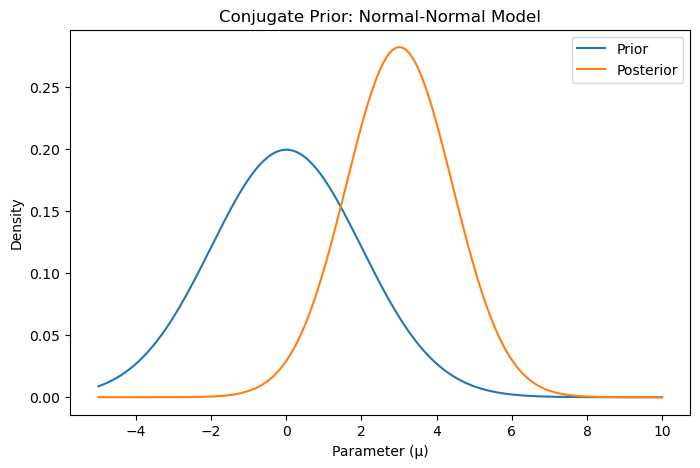

Running Noninformative Prior Example...


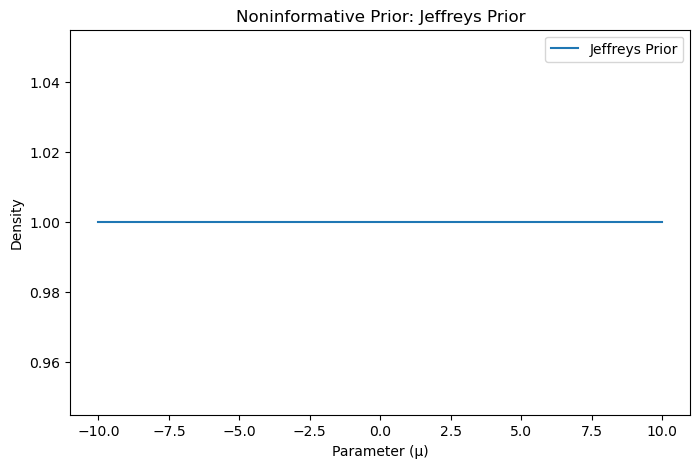

Running Reference Prior Example...


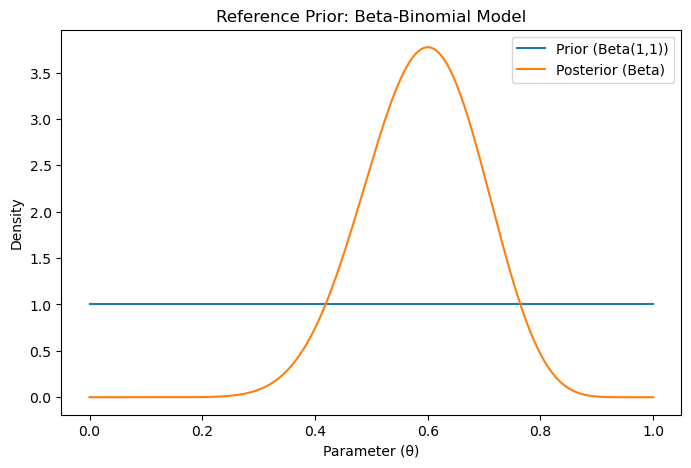

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta

# Conjugate Priors: Normal-Normal Model
def conjugate_prior_normal_normal():
    # Known parameters
    sigma2 = 4  # Variance of the likelihood
    n = 10      # Number of observations
    data = np.random.normal(5, np.sqrt(sigma2), n)

    # Likelihood parameters
    x_bar = np.mean(data)

    # Prior parameters
    mu_prior = 0
    tau2_prior = 4  # Prior variance

    # Posterior parameters
    mu_post = (tau2_prior * x_bar + sigma2 * mu_prior) / (tau2_prior + sigma2)
    tau2_post = (sigma2 * tau2_prior) / (sigma2 + tau2_prior)

    # Plotting
    x = np.linspace(-5, 10, 500)
    prior_dist = norm.pdf(x, mu_prior, np.sqrt(tau2_prior))
    posterior_dist = norm.pdf(x, mu_post, np.sqrt(tau2_post))

    plt.figure(figsize=(8, 5))
    plt.plot(x, prior_dist, label="Prior")
    plt.plot(x, posterior_dist, label="Posterior")
    plt.title("Conjugate Prior: Normal-Normal Model")
    plt.xlabel("Parameter (μ)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Noninformative Priors: Jeffreys Prior
def noninformative_prior_jeffreys():
    # Noninformative prior (Jeffreys prior)
    def jeffreys_prior(mu):
        # For normal distribution with known variance, the prior is constant
        return 1

    # Plotting
    x = np.linspace(-10, 10, 500)
    prior = [jeffreys_prior(val) for val in x]

    plt.figure(figsize=(8, 5))
    plt.plot(x, prior, label="Jeffreys Prior")
    plt.title("Noninformative Prior: Jeffreys Prior")
    plt.xlabel("Parameter (μ)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Reference Priors: Beta-Binomial Model
def reference_prior_beta_binomial():
    # Parameters for Beta prior (noninformative, flat Beta(1,1))
    alpha_prior, beta_prior = 1, 1

    # Binomial data
    n_trials = 20
    successes = 12

    # Posterior parameters
    alpha_post = alpha_prior + successes
    beta_post = beta_prior + n_trials - successes

    # Plotting
    x = np.linspace(0, 1, 500)
    prior_dist = beta.pdf(x, alpha_prior, beta_prior)
    posterior_dist = beta.pdf(x, alpha_post, beta_post)

    plt.figure(figsize=(8, 5))
    plt.plot(x, prior_dist, label="Prior (Beta(1,1))")
    plt.plot(x, posterior_dist, label="Posterior (Beta)")
    plt.title("Reference Prior: Beta-Binomial Model")
    plt.xlabel("Parameter (θ)")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Main function to run all examples
if __name__ == "__main__":
    print("Running Conjugate Prior Example...")
    conjugate_prior_normal_normal()
    
    print("Running Noninformative Prior Example...")
    noninformative_prior_jeffreys()
    
    print("Running Reference Prior Example...")
    reference_prior_beta_binomial()


## Kullback-Leibler Information and Reference Priors

The **Kullback-Leibler information**, $ K[f, g] $, also known as Kullback-Leibler information for discrimination between two densities, is given by:

$$
K[f, g] = \int f(x) \log \frac{f(x)}{g(x)} dx.
$$

As $ K[f, g] $ increases, it becomes easier to discriminate between the densities $ f $ and $ g $.

A reference prior can be understood as the density $ \pi(\theta) $ that maximizes (asymptotically) the expected Kullback-Leibler information (also known as Shannon information). Specifically, this information is maximized between the posterior $ \pi(\theta|x) $ and the prior $ \pi(\theta) $. 

The marginal distribution is given by:

$$
m_\pi(x) = \int f(x|\theta) \pi(\theta) d\theta,
$$

where $ f(x|\theta) $ is the likelihood and $ \pi(\theta) $ is the prior. Further details can be found in Bernardo and Smith (1994) and Robert (2001, Section 3.5). Approximations are discussed in Clarke and Barron (1990) and Clarke and Wasserman (1993).

---

##  Bootstrap Methods

Bootstrap (or resampling) techniques are a collection of computationally intensive methods that are based on resampling from the observed data. They were first introduced by Efron (1979) and further described in Efron (1982), Efron and Tibshirani (1994), and Hjorth (1994). For more theoretical treatments, see Hall (1992) and Barbe and Bertail (1995).

The basic idea of the bootstrap is to evaluate the properties of an arbitrary estimator $ \hat{\theta} $ using the empirical CDF of the sample $ X_1, \dots, X_n $, denoted by:

$$
F_n(x) = \frac{1}{n} \sum_{i=1}^n \mathbb{I}(X_i \leq x),
$$

instead of the theoretical CDF $ F(x) $.

If an estimate of:

$$
\theta(F) = \int h(x) dF(x)
$$

is desired, an obvious candidate is:

$$
\theta(F_n) = \int h(x) dF_n(x).
$$

When the $ X_i $'s are i.i.d., the Glivenko-Cantelli Theorem (see Billingsley, 1995) guarantees the sup-norm convergence of $ F_n $ to $ F $, ensuring that $ \theta(F_n) $ is a consistent estimator of $ \theta(F) $.

The bootstrap provides an "automatic" method of computing $ \theta(F_n) $ by resampling the data. It has become common to denote a bootstrap sample with a superscript "*", so we can draw bootstrap samples:

$$
X^* = (X_1^*, \dots, X_n^*) \sim F_n, \quad \text{i.i.d.}.
$$

(Note that each $ X_i^* $ is equal to one of the original $ X_i $'s, and the same value can appear multiple times in $ X^* $.)

Based on these bootstrap samples, $ \theta(F) $ can be approximated by the bootstrap estimator:

$$
\theta^*(F_n) = \int h(x) dF_n^*(x).
$$

**Historical Note:** The term "bootstrap" comes from the German novel *Adventures of Baron Munchausen* by Rudolph Raspe, where the hero saves himself from drowning by pulling on his own bootstraps.


## Bootstrap Estimation and Bias Approximation

For an arbitrary estimator $ \hat{\theta}(F) $, the bias, variance, or even the error distribution of $ \hat{\theta} $ can be approximated using the bootstrap method. These approximations involve replacing the population distribution $ F $ with the empirical distribution $ F_n $.

### Bias Approximation

The bootstrap estimator of the bias is given by:

$$
b_n = \mathbb{E}_{F_n} \left[\hat{\theta}(F_n) - \hat{\theta}(F)\right],
$$

where $ \hat{\theta}(F_n) $ is the estimator applied to the empirical distribution $ F_n $, and $ \hat{\theta}(F) $ is the true parameter.

### Confidence Interval

A confidence interval for $ \theta $ can be constructed by imposing the constraint:

$$
P_{F_n} \left( \alpha \leq \hat{\theta}(F_n) - \theta \leq \beta \right) = c,
$$

where $ c $ is the desired confidence level. This is equivalent to finding $ \alpha $ and $ \beta $ such that the proportion of bootstrap estimates within the interval matches the confidence level.

### Computation of Bias and Variance

Direct computation of $ \hat{\theta} $ is possible in specific cases. However, most setups require simulation to approximate the distribution of $ \hat{\theta}(F) $. For example, the distribution of $ \hat{\theta}(X^*) $, derived from the bootstrap samples, has discrete support:

$$
\{ \hat{\theta}(X_1^*), \hat{\theta}(X_2^*), \dots \},
$$

but the cardinality of this support, $ n^n $, grows too quickly for exhaustive computation, even for moderately sized samples.

### Practical Algorithms

Algorithms like those based on **Gray Codes** (Diaconis and Holmes, 1994) can allow for more efficient processing of larger sample sizes, although exhaustive computation remains infeasible for most practical cases.

---

### References




Original Statistic (Mean): 4.7923
Bootstrap Bias Estimate: 0.0031
Bootstrap 95% Confidence Interval: [4.4553, 5.1257]


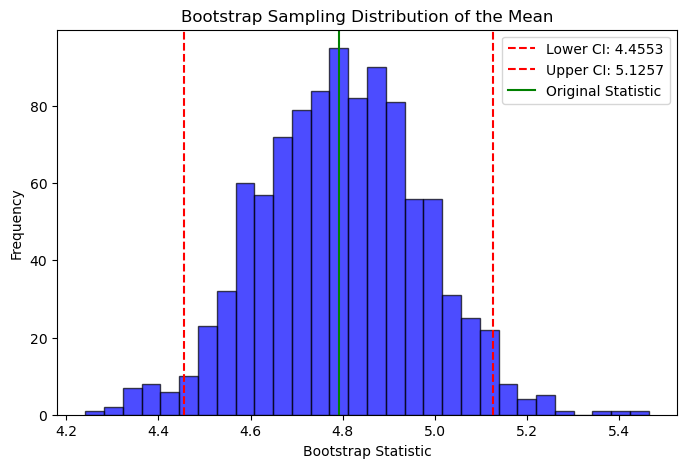

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def bootstrap_bias(data, statistic, n_bootstrap=1000):
    """
    Compute the bootstrap estimate of bias for a given statistic.
    
    Parameters:
        data (np.ndarray): Original dataset.
        statistic (callable): Function to compute the statistic of interest (e.g., np.mean).
        n_bootstrap (int): Number of bootstrap resamples.
        
    Returns:
        float: Estimated bias.
    """
    # Original statistic computed from the data
    theta_hat = statistic(data)
    
    # Bootstrap resamples
    bootstrap_samples = np.random.choice(data, (n_bootstrap, len(data)), replace=True)
    bootstrap_statistics = np.array([statistic(sample) for sample in bootstrap_samples])
    
    # Bias estimate
    bias = np.mean(bootstrap_statistics) - theta_hat
    return bias, bootstrap_statistics

def bootstrap_confidence_interval(bootstrap_statistics, alpha=0.05):
    """
    Compute the bootstrap confidence interval for a statistic.
    
    Parameters:
        bootstrap_statistics (np.ndarray): Bootstrap estimates of the statistic.
        alpha (float): Significance level (default is 0.05 for a 95% confidence interval).
        
    Returns:
        tuple: Lower and upper bounds of the confidence interval.
    """
    lower_bound = np.percentile(bootstrap_statistics, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_statistics, 100 * (1 - alpha / 2))
    return lower_bound, upper_bound

# Example: Mean estimation with bias and confidence intervals
np.random.seed(42)  # For reproducibility
data = np.random.normal(loc=5, scale=2, size=100)  # Example dataset (Normal distribution)

# Statistic to compute (mean in this case)
statistic = np.mean

# Bootstrap procedure
n_bootstrap = 1000
bias, bootstrap_stats = bootstrap_bias(data, statistic, n_bootstrap=n_bootstrap)
ci_lower, ci_upper = bootstrap_confidence_interval(bootstrap_stats)

# Results
print(f"Original Statistic (Mean): {statistic(data):.4f}")
print(f"Bootstrap Bias Estimate: {bias:.4f}")
print(f"Bootstrap 95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Plotting the bootstrap distribution
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_stats, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(ci_lower, color='red', linestyle='--', label=f"Lower CI: {ci_lower:.4f}")
plt.axvline(ci_upper, color='red', linestyle='--', label=f"Upper CI: {ci_upper:.4f}")
plt.axvline(statistic(data), color='green', linestyle='-', label="Original Statistic")
plt.title("Bootstrap Sampling Distribution of the Mean")
plt.xlabel("Bootstrap Statistic")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [11]:
import random

def bootstrap_bias(data, statistic, n_bootstrap=1000):
    """
    Compute the bootstrap estimate of bias for a given statistic using pure Python.
    
    Parameters:
        data (list): Original dataset (list of numbers).
        statistic (callable): Function to compute the statistic of interest (e.g., mean).
        n_bootstrap (int): Number of bootstrap resamples.
        
    Returns:
        tuple: Estimated bias and bootstrap statistics.
    """
    # Original statistic computed from the data
    theta_hat = statistic(data)
    
    # Bootstrap resamples
    bootstrap_statistics = []
    for _ in range(n_bootstrap):
        bootstrap_sample = [random.choice(data) for _ in data]
        bootstrap_statistics.append(statistic(bootstrap_sample))
    
    # Bias estimate
    bias = sum(bootstrap_statistics) / len(bootstrap_statistics) - theta_hat
    return bias, bootstrap_statistics

def bootstrap_confidence_interval(bootstrap_statistics, alpha=0.05):
    """
    Compute the bootstrap confidence interval for a statistic using pure Python.
    
    Parameters:
        bootstrap_statistics (list): Bootstrap estimates of the statistic.
        alpha (float): Significance level (default is 0.05 for a 95% confidence interval).
        
    Returns:
        tuple: Lower and upper bounds of the confidence interval.
    """
    sorted_statistics = sorted(bootstrap_statistics)
    lower_index = int(len(sorted_statistics) * (alpha / 2))
    upper_index = int(len(sorted_statistics) * (1 - alpha / 2))
    return sorted_statistics[lower_index], sorted_statistics[upper_index]

# Example: Mean estimation with bias and confidence intervals
def mean(data):
    """Compute the mean of a list of numbers."""
    return sum(data) / len(data)

# Generate example data (normal distribution simulated manually)
random.seed(42)  # For reproducibility
data = [random.gauss(5, 2) for _ in range(100)]  # Example dataset (mean=5, std=2)

# Statistic to compute (mean in this case)
n_bootstrap = 1000
bias, bootstrap_stats = bootstrap_bias(data, mean, n_bootstrap=n_bootstrap)
ci_lower, ci_upper = bootstrap_confidence_interval(bootstrap_stats)

# Results
print(f"Original Statistic (Mean): {mean(data):.4f}")
print(f"Bootstrap Bias Estimate: {bias:.4f}")
print(f"Bootstrap 95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


Original Statistic (Mean): 5.1165
Bootstrap Bias Estimate: -0.0018
Bootstrap 95% Confidence Interval: [4.7852, 5.4912]


Original Statistic (Mean): 5.1165
Bootstrap Bias Estimate: -0.0018
Bootstrap 95% Confidence Interval: [4.7852, 5.4912]


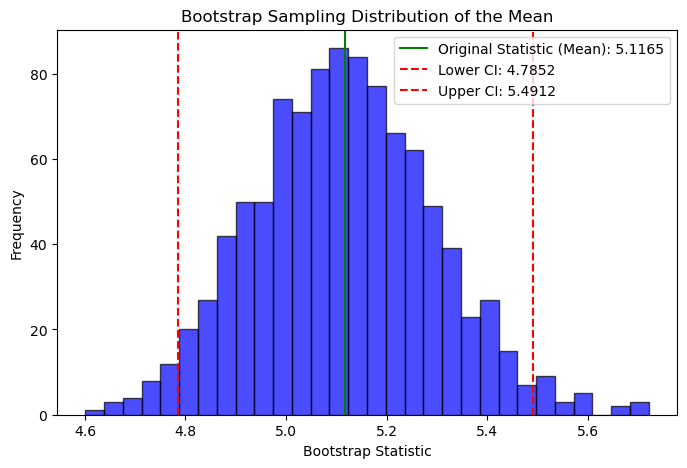

In [12]:
import random
import matplotlib.pyplot as plt

def bootstrap_bias(data, statistic, n_bootstrap=1000):
    """
    Compute the bootstrap estimate of bias for a given statistic using pure Python.
    
    Parameters:
        data (list): Original dataset (list of numbers).
        statistic (callable): Function to compute the statistic of interest (e.g., mean).
        n_bootstrap (int): Number of bootstrap resamples.
        
    Returns:
        tuple: Estimated bias and bootstrap statistics.
    """
    # Original statistic computed from the data
    theta_hat = statistic(data)
    
    # Bootstrap resamples
    bootstrap_statistics = []
    for _ in range(n_bootstrap):
        bootstrap_sample = [random.choice(data) for _ in data]
        bootstrap_statistics.append(statistic(bootstrap_sample))
    
    # Bias estimate
    bias = sum(bootstrap_statistics) / len(bootstrap_statistics) - theta_hat
    return bias, bootstrap_statistics

def bootstrap_confidence_interval(bootstrap_statistics, alpha=0.05):
    """
    Compute the bootstrap confidence interval for a statistic using pure Python.
    
    Parameters:
        bootstrap_statistics (list): Bootstrap estimates of the statistic.
        alpha (float): Significance level (default is 0.05 for a 95% confidence interval).
        
    Returns:
        tuple: Lower and upper bounds of the confidence interval.
    """
    sorted_statistics = sorted(bootstrap_statistics)
    lower_index = int(len(sorted_statistics) * (alpha / 2))
    upper_index = int(len(sorted_statistics) * (1 - alpha / 2))
    return sorted_statistics[lower_index], sorted_statistics[upper_index]

# Example: Mean estimation with bias and confidence intervals
def mean(data):
    """Compute the mean of a list of numbers."""
    return sum(data) / len(data)

# Generate example data (normal distribution simulated manually)
random.seed(42)  # For reproducibility
data = [random.gauss(5, 2) for _ in range(100)]  # Example dataset (mean=5, std=2)

# Statistic to compute (mean in this case)
n_bootstrap = 1000
bias, bootstrap_stats = bootstrap_bias(data, mean, n_bootstrap=n_bootstrap)
ci_lower, ci_upper = bootstrap_confidence_interval(bootstrap_stats)

# Results
print(f"Original Statistic (Mean): {mean(data):.4f}")
print(f"Bootstrap Bias Estimate: {bias:.4f}")
print(f"Bootstrap 95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Plotting the bootstrap distribution
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_stats, bins=30, alpha=0.7, color='blue', edgecolor='black')

# Plot the original statistic and confidence intervals
plt.axvline(mean(data), color='green', linestyle='-', label=f"Original Statistic (Mean): {mean(data):.4f}")
plt.axvline(ci_lower, color='red', linestyle='--', label=f"Lower CI: {ci_lower:.4f}")
plt.axvline(ci_upper, color='red', linestyle='--', label=f"Upper CI: {ci_upper:.4f}")

# Add labels and title
plt.title("Bootstrap Sampling Distribution of the Mean")
plt.xlabel("Bootstrap Statistic")
plt.ylabel("Frequency")
plt.legend()

# Display the plot
plt.show()
